#HOMEWORK 2:

---------------

## Task 1 - NRI Data Cleaning

In [47]:
import pandas as pd
import numpy as np

NRI_data = pd.read_csv(r'C:\Users\ctao\OneDrive - RAND Corporation\Desktop\Class\Machine Learning\Machine_Learning_2025\data\raw\NRI_Table_Counties (5)\NRI_Table_Counties.csv',dtype={'STCOFIPS':str})
cols_to_include = [col for col in NRI_data.columns if ((col.endswith('_AFREQ')) or
    (col.endswith('_RISKR')) or (col == 'STCOFIPS'))]
NRI_data = NRI_data[cols_to_include]
NRI_missing = NRI_data.isna().sum()
NRI_missing

STCOFIPS         0
AVLN_AFREQ    3023
AVLN_RISKR       0
CFLD_AFREQ    2646
CFLD_RISKR       0
CWAV_AFREQ       0
CWAV_RISKR       0
DRGT_AFREQ       7
DRGT_RISKR       0
ERQK_AFREQ       0
ERQK_RISKR       0
HAIL_AFREQ       7
HAIL_RISKR       0
HWAV_AFREQ       0
HWAV_RISKR       0
HRCN_AFREQ     918
HRCN_RISKR       0
ISTM_AFREQ     229
ISTM_RISKR       0
LNDS_AFREQ      40
LNDS_RISKR       0
LTNG_AFREQ     123
LTNG_RISKR       0
RFLD_AFREQ       0
RFLD_RISKR       0
SWND_AFREQ       7
SWND_RISKR       0
TRND_AFREQ       7
TRND_RISKR       0
TSUN_AFREQ    3103
TSUN_RISKR       0
VLCN_AFREQ    3125
VLCN_RISKR       0
WFIR_AFREQ      88
WFIR_RISKR       0
WNTW_AFREQ       0
WNTW_RISKR       0
dtype: int64

In [48]:
NRI_data['MISSING_AVLN'] = NRI_data['AVLN_AFREQ'].isna()
crosstab = pd.crosstab(NRI_data['MISSING_AVLN'],NRI_data['AVLN_RISKR'])
crosstab

AVLN_RISKR,Not Applicable,Relatively High,Relatively Low,Relatively Moderate,Very High,Very Low
MISSING_AVLN,,,,,,
False,0,15,52,33,9,99
True,3023,0,0,0,0,0


I observe a high amount of Missing values (NA values), and relatively low amounts of non null data

In [49]:
NRI_data['AVLN_AFREQ'] = [row['AVLN_AFREQ'] if row['MISSING_AVLN'] == False else 0 for i,row in NRI_data.iterrows()]

## Task 2: SVI Data Cleaning

In [50]:
SVI_data = pd.read_csv(r'C:\Users\ctao\OneDrive - RAND Corporation\Desktop\Class\Machine Learning\Machine_Learning_2025\data\raw\SVI_2022_US_county.csv',dtype={'FIPS':str})
columns = ["ST", "STATE", "ST_ABBR", "STCNTY", "COUNTY", "FIPS", "LOCATION", "AREA_SQMI",
    "E_TOTPOP", "EP_POV150", "EP_UNEMP", "EP_HBURD", "EP_NOHSDP", "EP_UNINSUR",
    "EP_AGE65", "EP_AGE17", "EP_DISABL", "EP_SNGPNT", "EP_LIMENG", "EP_MINRTY",
    "EP_MUNIT", "EP_MOBILE", "EP_CROWD", "EP_NOVEH", "EP_GROUPQ", "EP_NOINT",
    "EP_AFAM", "EP_HISP", "EP_ASIAN", "EP_AIAN", "EP_NHPI", "EP_TWOMORE", "EP_OTHERRACE"]
SVI_data = SVI_data[columns] #SUBSET TO COLS

In [51]:
SVI_missing = SVI_data.isna().sum()
SVI_missing

ST              0
STATE           0
ST_ABBR         0
STCNTY          0
COUNTY          0
FIPS            0
LOCATION        0
AREA_SQMI       0
E_TOTPOP        0
EP_POV150       0
EP_UNEMP        0
EP_HBURD        0
EP_NOHSDP       0
EP_UNINSUR      0
EP_AGE65        0
EP_AGE17        0
EP_DISABL       0
EP_SNGPNT       0
EP_LIMENG       0
EP_MINRTY       0
EP_MUNIT        0
EP_MOBILE       0
EP_CROWD        0
EP_NOVEH        0
EP_GROUPQ       0
EP_NOINT        0
EP_AFAM         0
EP_HISP         0
EP_ASIAN        0
EP_AIAN         0
EP_NHPI         0
EP_TWOMORE      0
EP_OTHERRACE    0
dtype: int64

## Task 3 - Data Merging

In [52]:
non_present_codes = [fips for fips in NRI_data['STCOFIPS'] if not (fips in list(SVI_data['FIPS']))]
print(non_present_codes)

['09001', '09003', '09005', '09007', '09009', '09011', '09013', '09015', '60010', '60020', '60050', '66010', '69100', '69110', '69120', '72001', '72003', '72005', '72007', '72009', '72011', '72013', '72015', '72017', '72019', '72021', '72023', '72025', '72027', '72029', '72031', '72033', '72035', '72037', '72039', '72041', '72043', '72045', '72047', '72049', '72051', '72053', '72054', '72055', '72057', '72059', '72061', '72063', '72065', '72067', '72069', '72071', '72073', '72075', '72077', '72079', '72081', '72083', '72085', '72087', '72089', '72091', '72093', '72095', '72097', '72099', '72101', '72103', '72105', '72107', '72109', '72111', '72113', '72115', '72117', '72119', '72121', '72123', '72125', '72127', '72129', '72131', '72133', '72135', '72137', '72139', '72141', '72143', '72145', '72147', '72149', '72151', '72153', '78010', '78020', '78030']


I notice that there appear to be some codes which do not appear in both sets, many appear to start with 7. This will mean that any merged data set will not be able to compare SVI and NRI data for those codes.

In [53]:
Merged_data = NRI_data.merge(SVI_data,left_on='STCOFIPS',right_on='FIPS',how='outer')
Merged_data.isna().sum()

STCOFIPS           9
AVLN_AFREQ         9
AVLN_RISKR         9
CFLD_AFREQ      2655
CFLD_RISKR         9
                ... 
EP_ASIAN          96
EP_AIAN           96
EP_NHPI           96
EP_TWOMORE        96
EP_OTHERRACE      96
Length: 71, dtype: int64

## Task 5: Data Analysis

array([[<Axes: title={'center': 'AVLN_AFREQ'}>,
        <Axes: title={'center': 'CFLD_AFREQ'}>,
        <Axes: title={'center': 'CWAV_AFREQ'}>,
        <Axes: title={'center': 'DRGT_AFREQ'}>,
        <Axes: title={'center': 'ERQK_AFREQ'}>,
        <Axes: title={'center': 'HAIL_AFREQ'}>,
        <Axes: title={'center': 'HWAV_AFREQ'}>],
       [<Axes: title={'center': 'HRCN_AFREQ'}>,
        <Axes: title={'center': 'ISTM_AFREQ'}>,
        <Axes: title={'center': 'LNDS_AFREQ'}>,
        <Axes: title={'center': 'LTNG_AFREQ'}>,
        <Axes: title={'center': 'RFLD_AFREQ'}>,
        <Axes: title={'center': 'SWND_AFREQ'}>,
        <Axes: title={'center': 'TRND_AFREQ'}>],
       [<Axes: title={'center': 'TSUN_AFREQ'}>,
        <Axes: title={'center': 'VLCN_AFREQ'}>,
        <Axes: title={'center': 'WFIR_AFREQ'}>,
        <Axes: title={'center': 'WNTW_AFREQ'}>,
        <Axes: title={'center': 'ST'}>,
        <Axes: title={'center': 'STCNTY'}>,
        <Axes: title={'center': 'AREA_SQMI'}>],
  

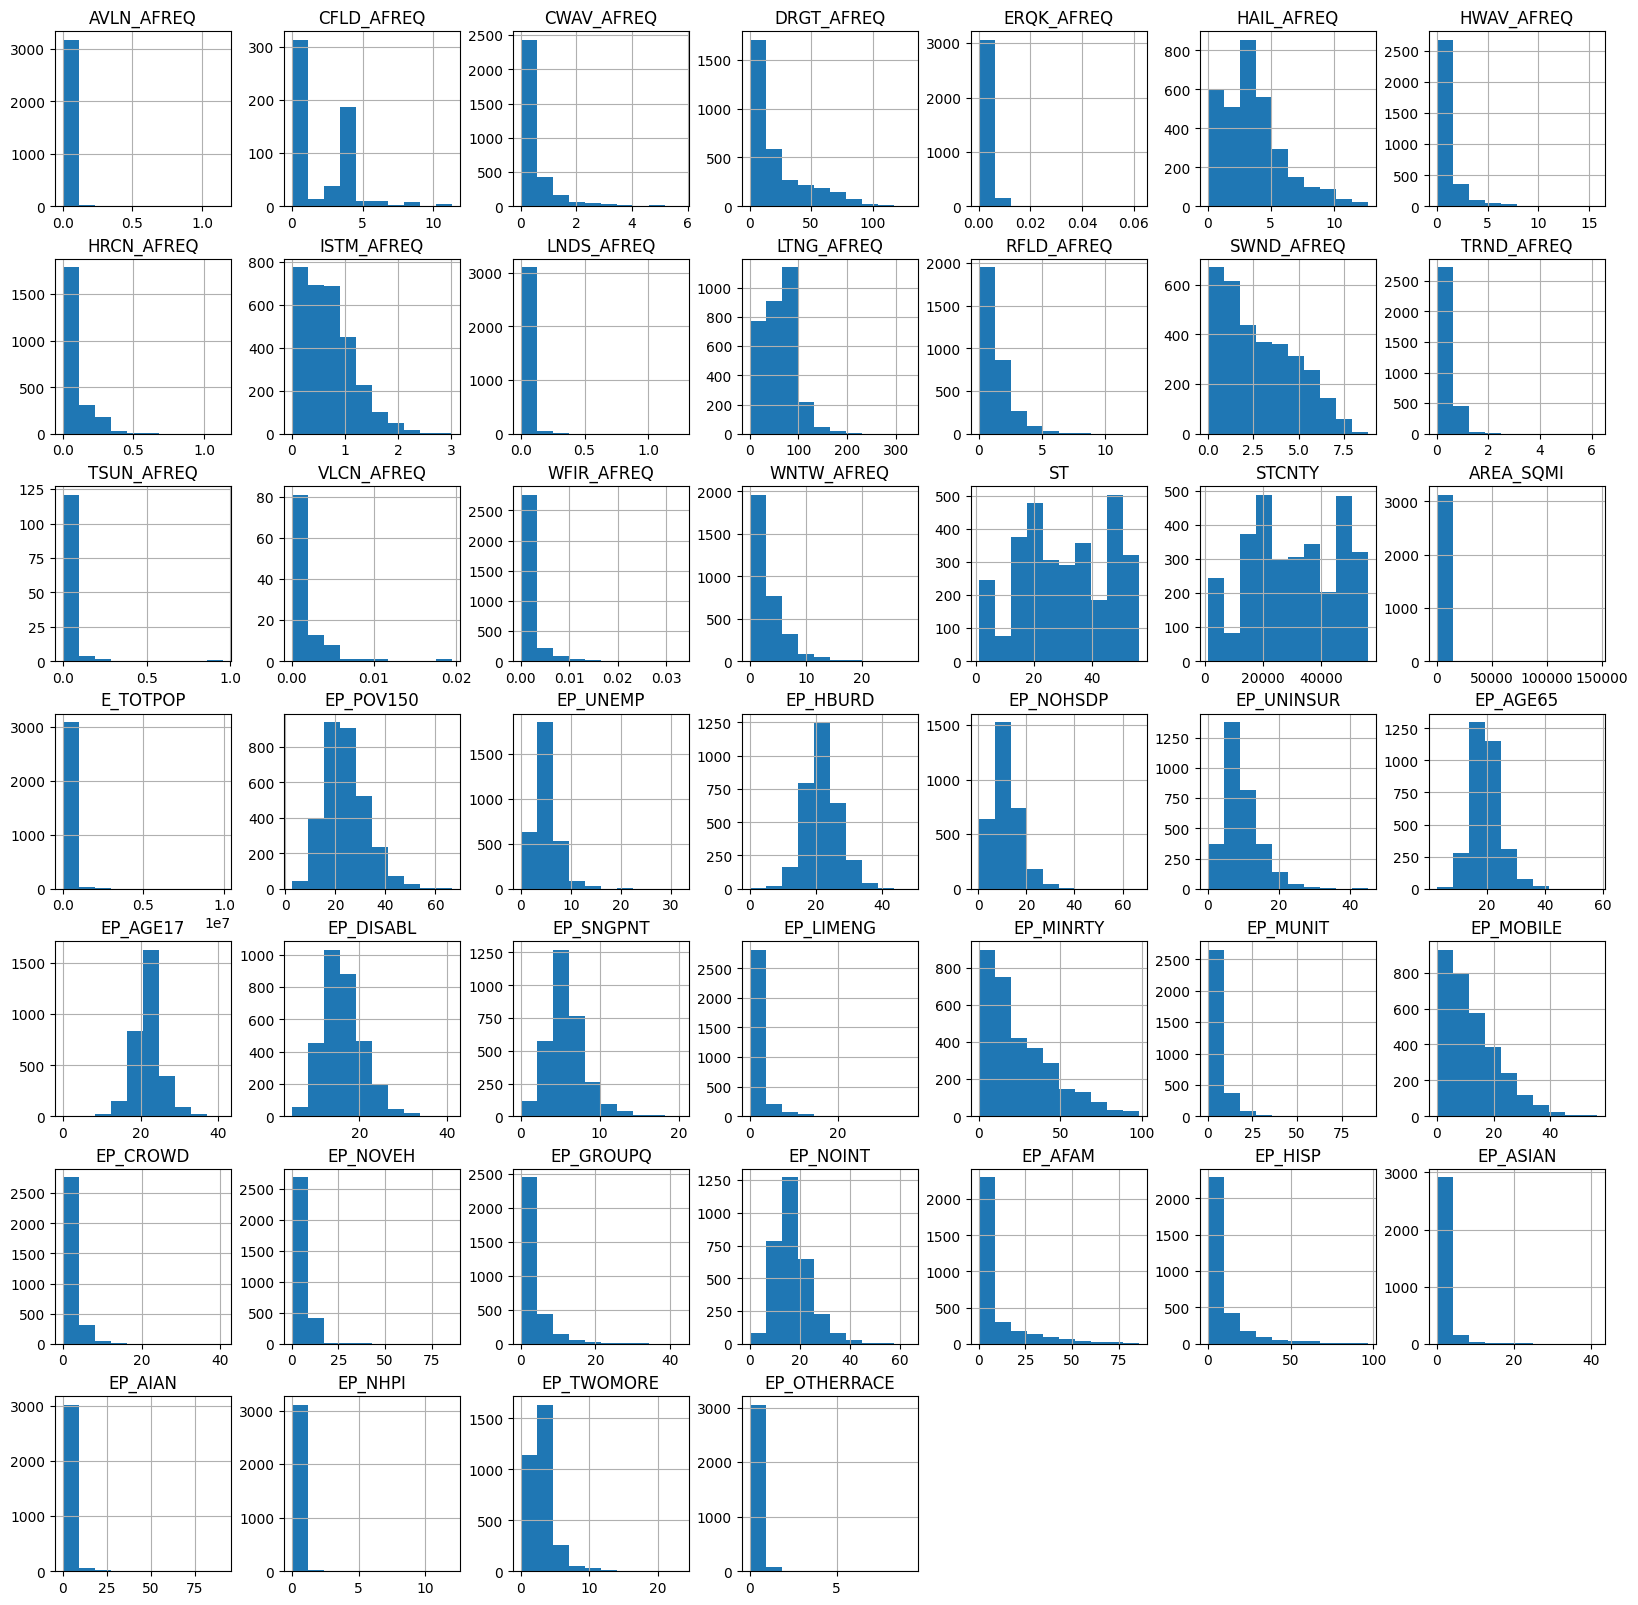

In [54]:
import matplotlib.pyplot as plt
Merged_data.hist(figsize=(20,20))